In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import xgboost as xgb
import shap
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
shap.initjs()
from sklearn.model_selection import train_test_split

/opt/anaconda3/envs/SGC/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
file_path = "../dataset/final_cleaned_transformed_dataset.csv"
df = pd.read_csv(file_path)
X = df.drop("label", axis=1)
y = df['label']

In [4]:
model = xgb.XGBClassifier()
# model = ExtraTreesClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [5]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

100%|===================| 2875385/2875392 [609:08<00:00]         

In [6]:
print(type(shap_values))
print(shap_values[:,:,0].values.shape)  # Shape should match (number_of_instances, number_of_features)
print(X.values.shape)

<class 'shap._explanation.Explanation'>
(479232, 150)
(479232, 150)


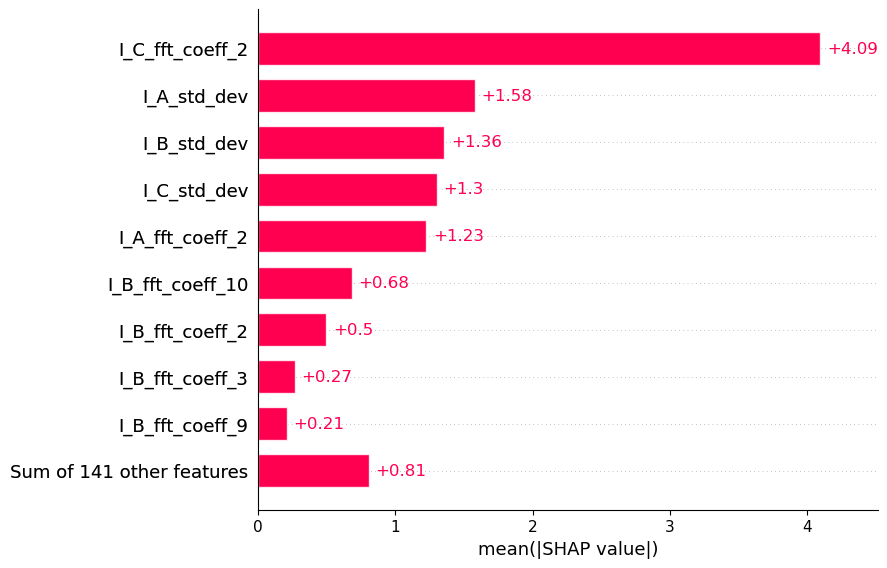

In [29]:
shap.plots.bar(shap_values[:,:,0])

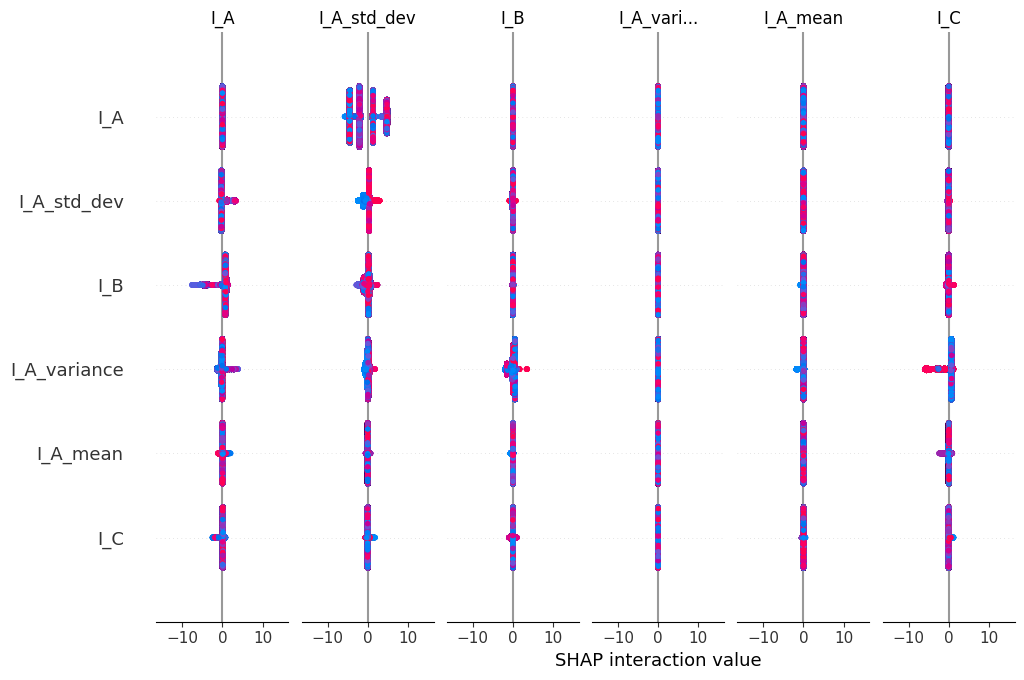

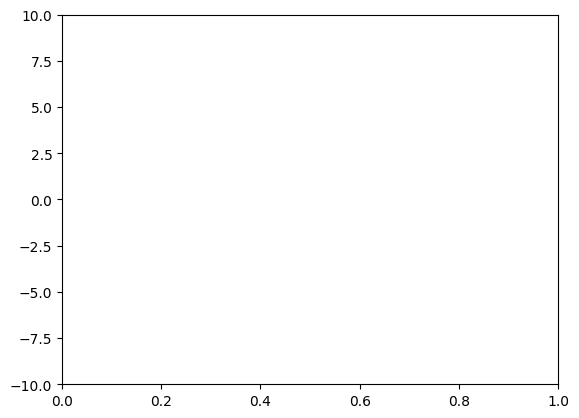

In [7]:
shap.summary_plot(shap_values, X, feature_names=X.columns)
# Adjust the y-axis to zoom in
plt.ylim(-10, 10)  # Adjust these values based on your data range for better zoom
plt.show()

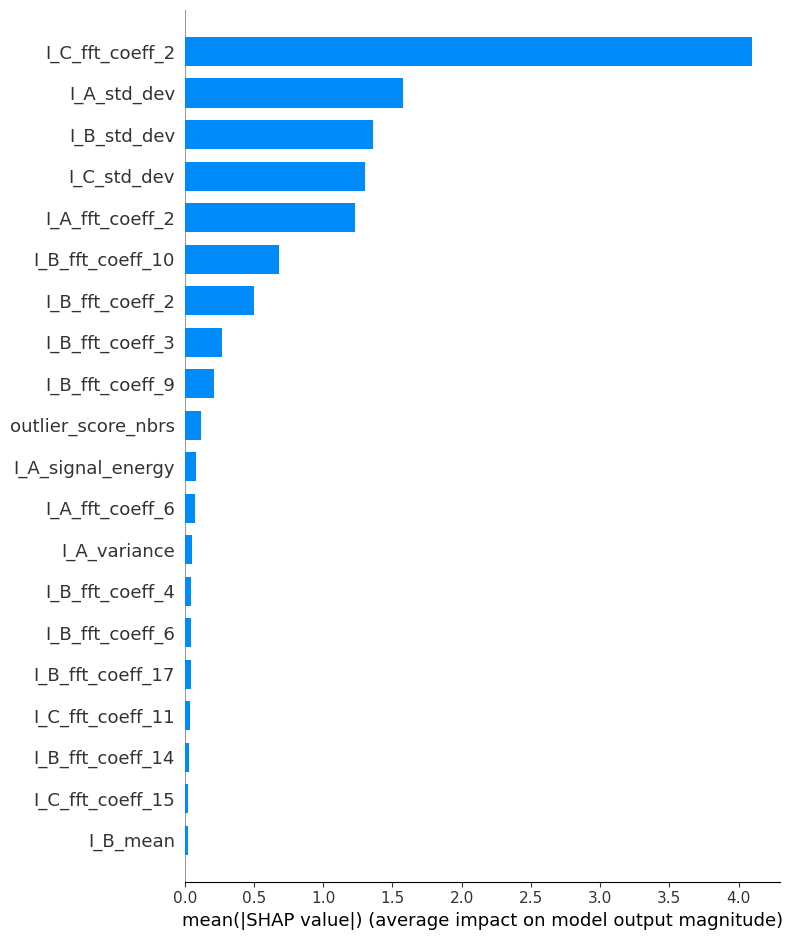

In [30]:
shap.summary_plot(shap_values[:,:,0], X, plot_type="bar")

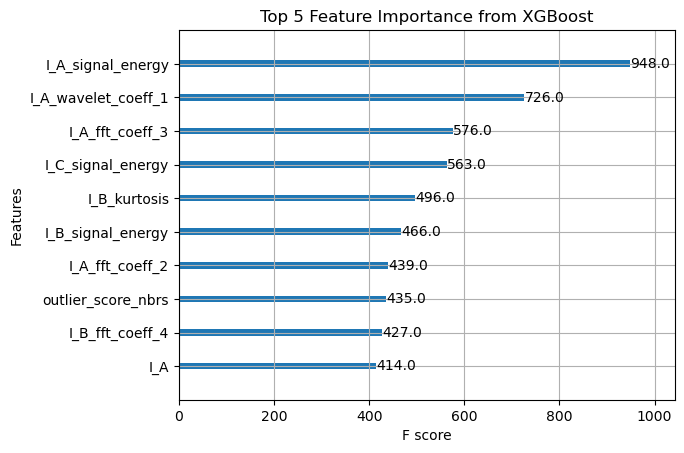

In [12]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 5 Feature Importance from XGBoost")
plt.show()

In [14]:
shap.force_plot(explainer.expected_value, shap_values[:1000, :], X.iloc[:1000, :])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).